# Objectives

Understand the distribution of key features like price_in_euro, mileage_in_km, and power_kw.

Examine relationships between features, especially how they relate to price_in_euro as a target variable.

Examine the relationship between brand and price_in_euro.

Explore how power_kw and mileage_in_km relate to price_in_euro.

Conduct statistical tests (e.g., chi-square, t-tests) to validate assumptions, such as the relationship between transmission_type and fuel_consumption_l_100km.

Explore how brand and model influence the price.

Analyze the impact of transmission_type and fuel_type on mileage_in_km.

Investigate correlations between different features, such as power_kw, mileage_in_km, and fuel_type.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA
import os
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from memory_profiler import memory_usage

df = pd.read_csv("gcar_data.csv")

D:\ANACONDA\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [3]:
file_name= "gcar_data.csv"
print("Size of Dataset is {} bytes".format(os.path.getsize(file_name)))
print("Size of Dataset is {} MB".format(os.path.getsize(file_name)>>20))

Size of Dataset is 13763318 bytes
Size of Dataset is 13 MB


Dropping the columns 'Unnamed:0','offer_description', and 'registartion_date' as they are irrelevant to the analysis.

In [4]:
df = df.iloc[:, 1:-1]
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0


In [5]:
df = df.drop(df.columns[3], axis=1)
df.head()

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0
1,hyundai,Hyundai i10,black,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0
2,audi,Audi Q4 e-tron,grey,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0
3,honda,Honda CR-V,red,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0
4,kia,Kia Sportage,black,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0


In [22]:
# Ensure the columns are treated as strings
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype(str)
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].astype(str)

# Clean the 'fuel_consumption_l_100km' column
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km']\
    .str.replace(' l/100 km', '', regex=False)\
    .str.replace(' kWh/100 km', '', regex=False)\
    .str.replace(',', '.')

# Clean the 'fuel_consumption_g_km' column
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km']\
    .str.replace(' g/km', '', regex=False)

# Convert to appropriate numeric types with error handling
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')
df['fuel_consumption_g_km'] = pd.to_numeric(df['fuel_consumption_g_km'], errors='coerce')

df.head()

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,15,366,1,2023,38490,140,190,0,31,5.4,124.0,100.0
1,17,420,1,2018,11555,49,67,1,36,4.6,106.0,27782.0
3,16,388,9,2018,24490,114,155,0,36,7.5,175.0,57000.0
4,22,481,1,2023,34990,110,150,1,36,5.9,150.0,7500.0
5,16,389,1,2009,5800,103,140,1,36,6.7,155.0,160000.0


In [23]:
print("Basic Info about the Dataset:")
print()
df.info()
print()
df.describe()

Basic Info about the Dataset:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88584 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     88584 non-null  int32  
 1   model                     88584 non-null  int32  
 2   color                     88584 non-null  int32  
 3   year                      88584 non-null  object 
 4   price_in_euro             88584 non-null  object 
 5   power_kw                  88584 non-null  object 
 6   power_ps                  88584 non-null  object 
 7   transmission_type         88584 non-null  int32  
 8   fuel_type                 88584 non-null  int32  
 9   fuel_consumption_l_100km  87885 non-null  float64
 10  fuel_consumption_g_km     78086 non-null  float64
 11  mileage_in_km             88584 non-null  float64
dtypes: float64(3), int32(5), object(4)
memory usage: 7.1+ MB



,brand,model,color,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,88584.000000,88584.000000,88584.000000,88584.000000,88584.000000,87885.000000,78086.000000,8.858400e+04
mean,10.528651,249.577226,6.207329,0.493498,32.222681,6.296946,150.633274,8.854514e+04
std,7.927832,167.583704,4.222566,0.525006,4.343624,7.279929,63.155108,7.999647e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,4.000000,82.000000,1.000000,0.000000,27.000000,5.000000,120.000000,2.800000e+04
50%,9.000000,254.000000,7.000000,0.000000,36.000000,5.800000,140.000000,7.190000e+04
75%,15.000000,381.000000,10.000000,1.000000,36.000000,7.000000,170.000000,1.320000e+05
max,28.000000,550.000000,13.000000,3.000000,36.000000,2006.000000,2022.000000,3.800000e+06


In [24]:
print("Dataset shape - ",df.shape)

Dataset shape -  (88584, 12)


## Data Cleaning

In [25]:
# Find missing data in each column
missing_data = df.isnull()

# Count missing values for each column
missing_counts = missing_data.sum()

# Calculate percentage of missing values for each column
missing_percentage = (missing_counts / len(df)) * 100

# Create a DataFrame to store missing data information
missing_info = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage Missing': missing_percentage
})

# Display missing data information
print("\nMissing Data Information:")
print(missing_info)


Missing Data Information:
                          Missing Values  Percentage Missing
brand                                  0            0.000000
model                                  0            0.000000
color                                  0            0.000000
year                                   0            0.000000
price_in_euro                          0            0.000000
power_kw                               0            0.000000
power_ps                               0            0.000000
transmission_type                      0            0.000000
fuel_type                              0            0.000000
fuel_consumption_l_100km             699            0.789082
fuel_consumption_g_km              10498           11.850899
mileage_in_km                          0            0.000000


In [26]:
df.dropna(inplace=True)

In [27]:
# Find missing data in each column
missing_data = df.isnull()

# Count missing values for each column
missing_counts = missing_data.sum()

# Calculate percentage of missing values for each column
missing_percentage = (missing_counts / len(df)) * 100

# Create a DataFrame to store missing data information
missing_info = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage Missing': missing_percentage
})

# Display missing data information
print("\nMissing Data Information:")
print(missing_info)


Missing Data Information:
                          Missing Values  Percentage Missing
brand                                  0                 0.0
model                                  0                 0.0
color                                  0                 0.0
year                                   0                 0.0
price_in_euro                          0                 0.0
power_kw                               0                 0.0
power_ps                               0                 0.0
transmission_type                      0                 0.0
fuel_type                              0                 0.0
fuel_consumption_l_100km               0                 0.0
fuel_consumption_g_km                  0                 0.0
mileage_in_km                          0                 0.0


Encoding categorical variables

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}

# Function to encode columns
def encode_column(column_name):
    le = LabelEncoder()
    df[column_name] = le.fit_transform(df[column_name])
    label_encoders[column_name] = le

# Encode each column
for col in ['brand', 'model', 'color', 'transmission_type', 'fuel_type']:
    encode_column(col)

df.head()

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,15,352,1,2023,38490,140,190,0,5,5.4,124.0,100.0
1,17,401,1,2018,11555,49,67,1,8,4.6,106.0,27782.0
3,16,373,9,2018,24490,114,155,0,8,7.5,175.0,57000.0
4,22,457,1,2023,34990,110,150,1,8,5.9,150.0,7500.0
5,16,374,1,2009,5800,103,140,1,8,6.7,155.0,160000.0


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot distribution of 'price_in_euro'
plt.figure(figsize=(10, 6))
sns.histplot(df['price_in_euro'], kde=True, bins=30, color='blue')
plt.title('Distribution of Price in Euro')
plt.xlabel('Price in Euro')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of 'mileage_in_km'
plt.figure(figsize=(10, 6))
sns.histplot(df['mileage_in_km'], kde=True, bins=30, color='green')
plt.title('Distribution of Mileage in KM')
plt.xlabel('Mileage in KM')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of 'power_kw'
plt.figure(figsize=(10, 6))
sns.histplot(df['power_kw'], kde=True, bins=30, color='red')
plt.title('Distribution of Power (KW)')
plt.xlabel('Power (KW)')
plt.ylabel('Frequency')
plt.show()

# Plot categorical distribution of 'brand'
plt.figure(figsize=(12, 8))
sns.countplot(y=df['brand'], order=df['brand'].value_counts().index, palette="viridis")
plt.title('Distribution of Car Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

KeyboardInterrupt: 

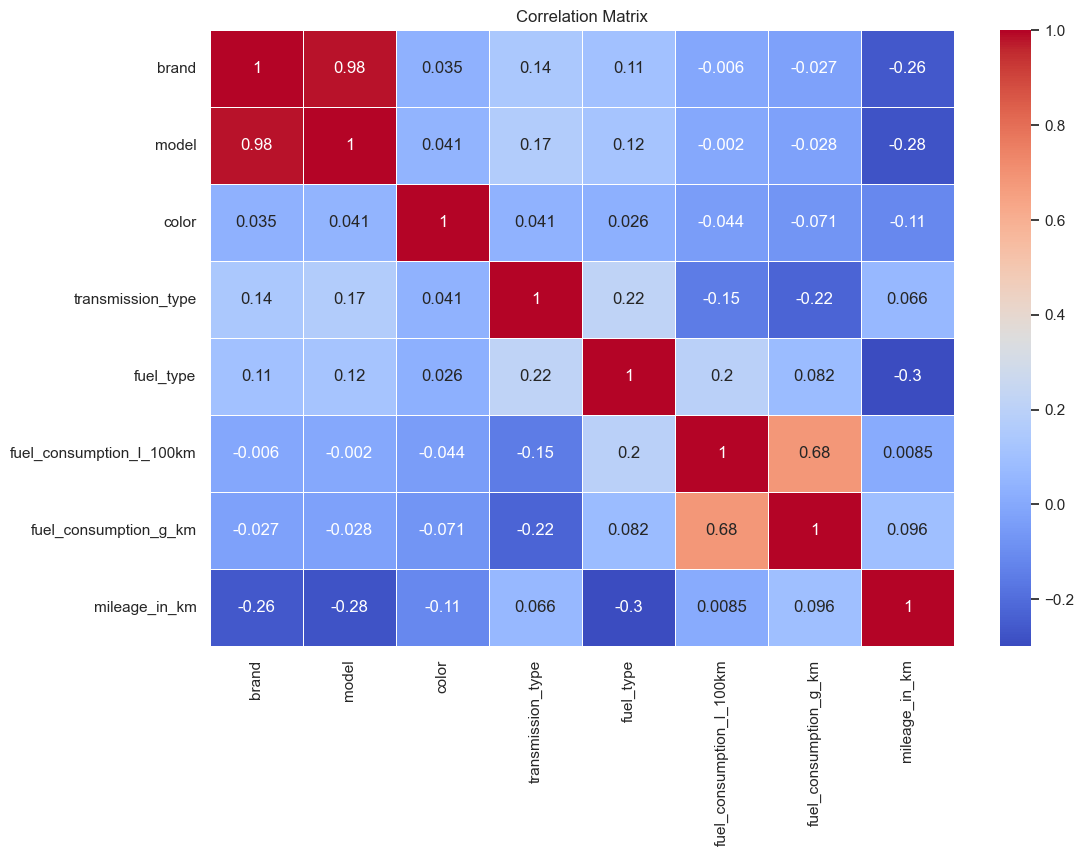

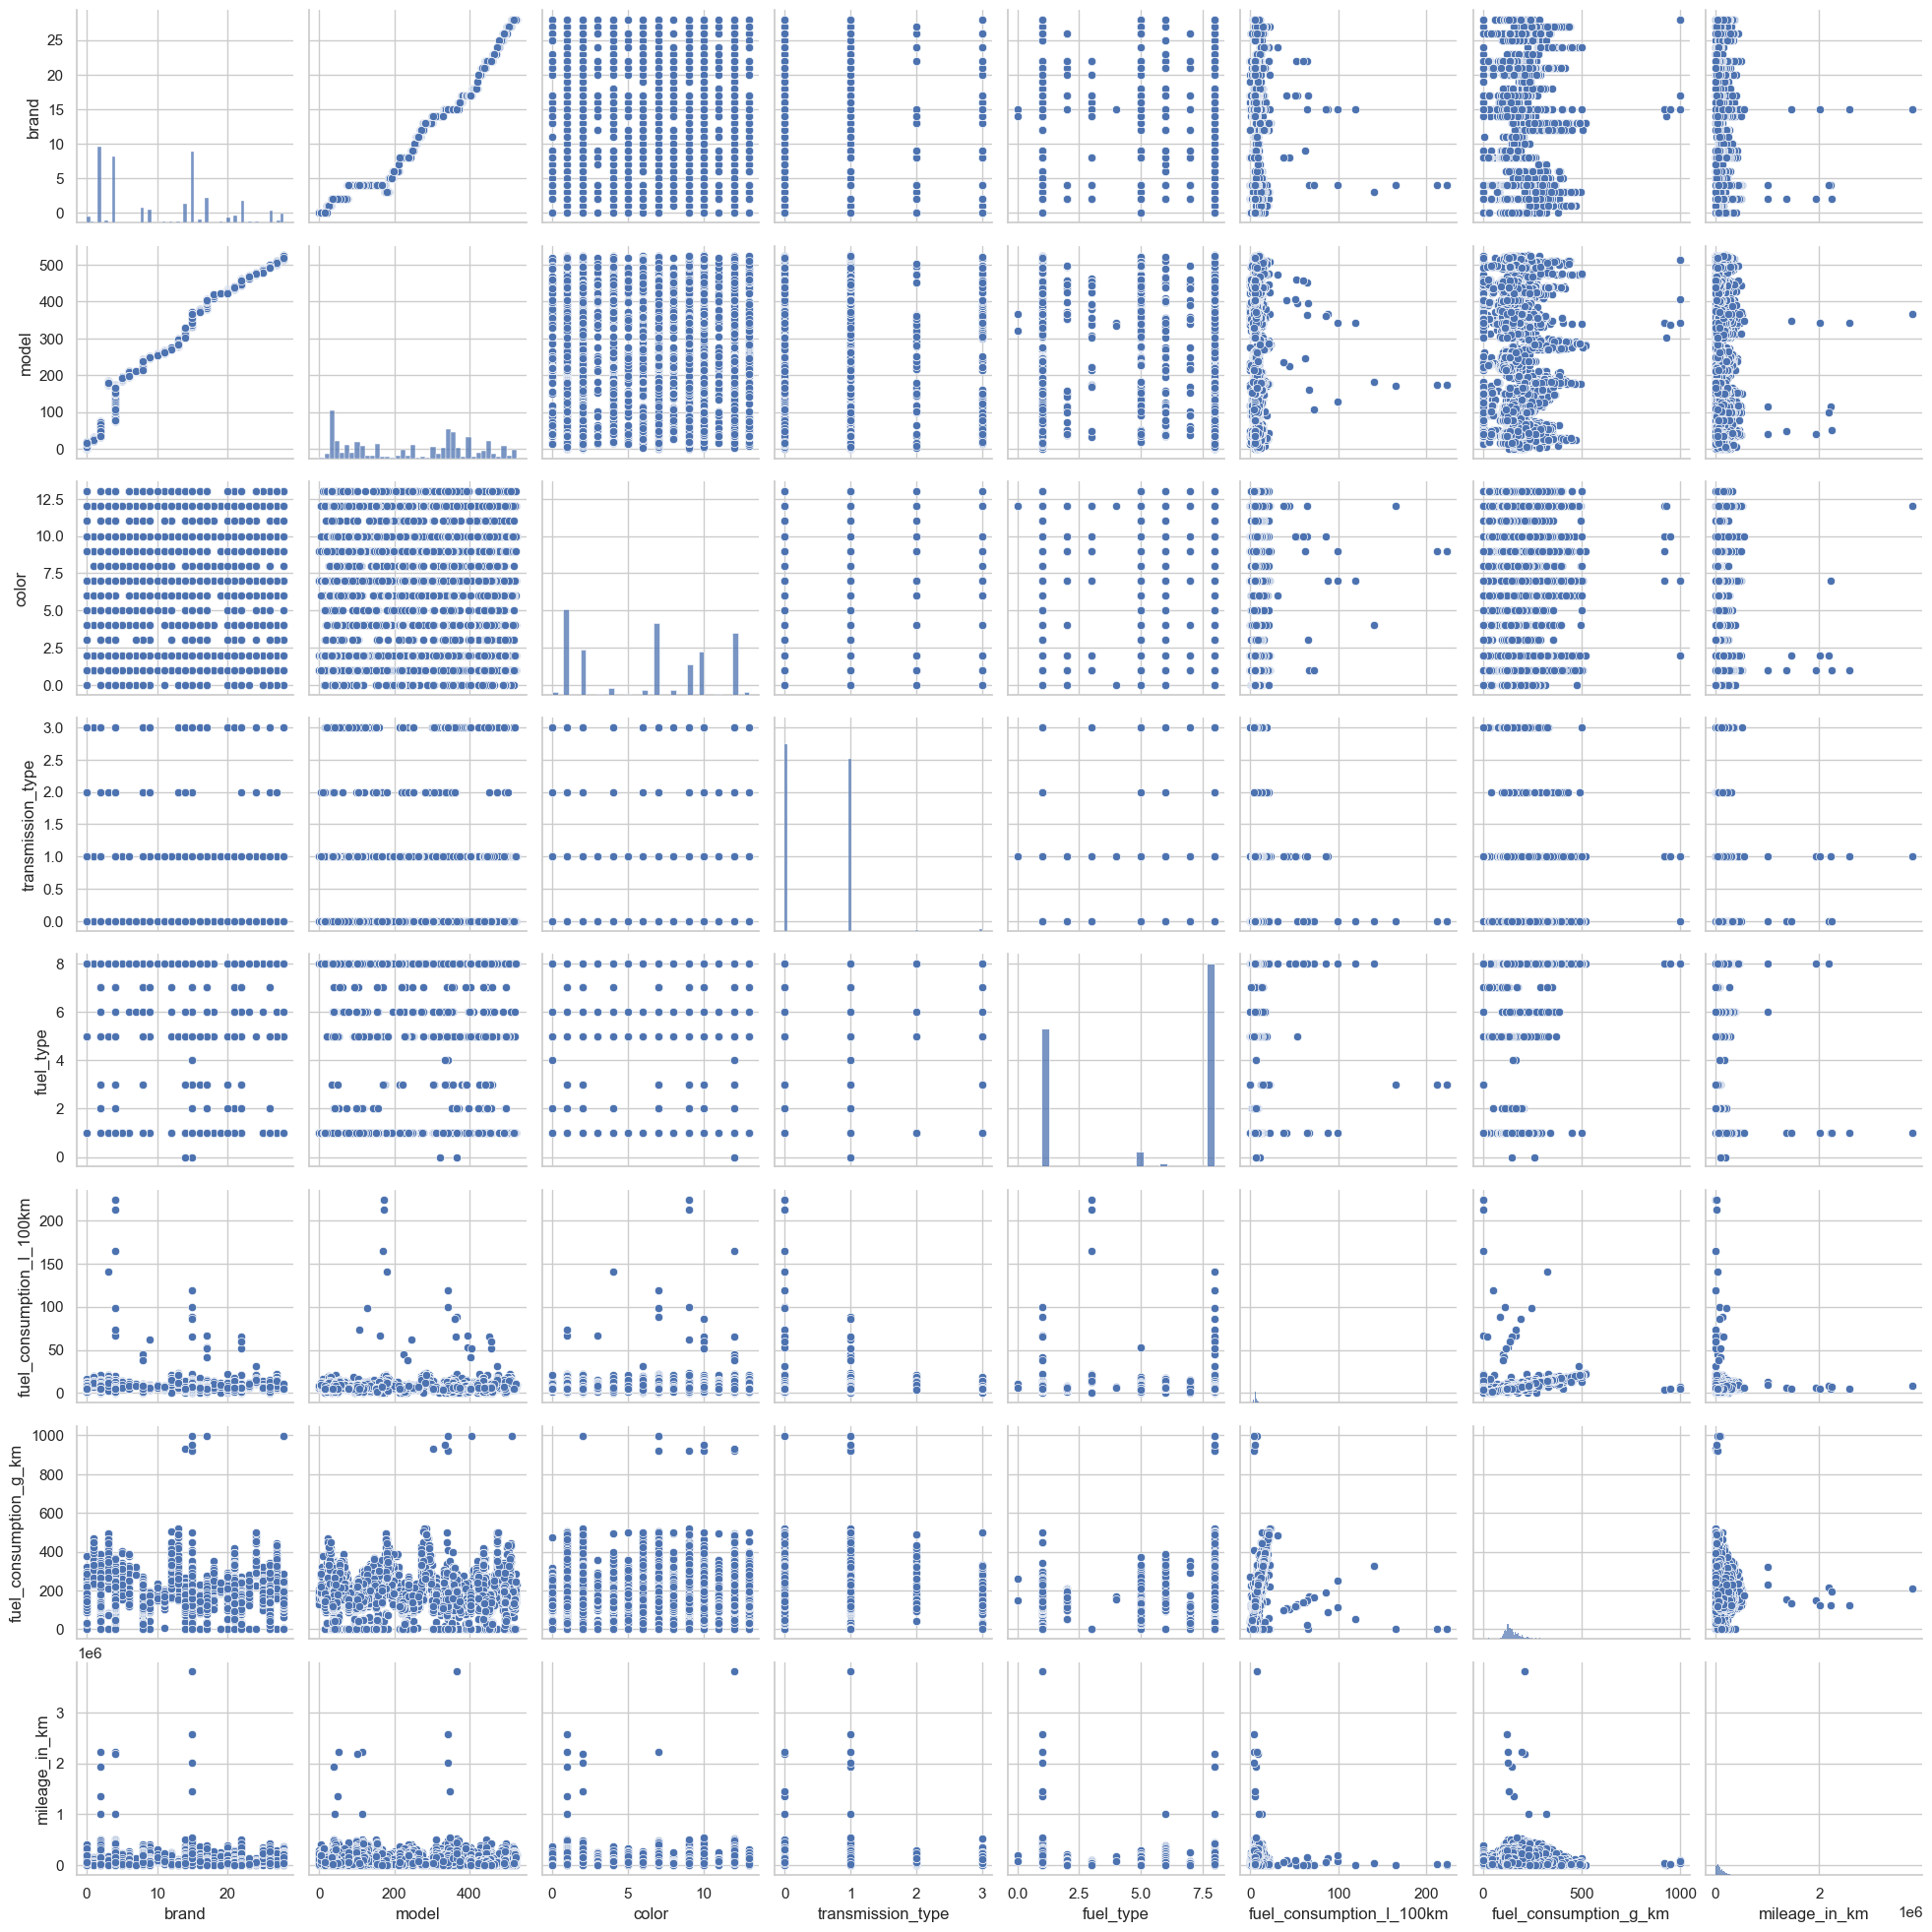

KeyboardInterrupt: 

In [31]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

# Distribution of the target variable
target_col = 'price_in_euro'  # Replace with the actual target column name
plt.figure(figsize=(8, 6))
sns.histplot(df[target_col], kde=True, color='blue')
plt.title(f'Distribution of {target_col}')
plt.show()

# Relationship between a specific feature and target
feature_col = 'power_kw'  # Replace with an actual feature column name
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[target_col], y=df[feature_col])
plt.title(f'Relationship between {feature_col} and {target_col}')
plt.show()

## Neural Network

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
print(df.dtypes)

brand                         int64
model                         int64
color                         int64
year                          int64
price_in_euro                 int64
power_kw                      int64
power_ps                      int64
transmission_type             int64
fuel_type                     int64
fuel_consumption_l_100km    float64
fuel_consumption_g_km       float64
mileage_in_km               float64
dtype: object


In [52]:
df = df.apply(pd.to_numeric, errors='coerce')

In [48]:
print(df.dtypes)

brand                         int64
model                         int64
color                         int64
year                          int64
price_in_euro                 int64
power_kw                      int64
power_ps                      int64
transmission_type             int64
fuel_type                     int64
fuel_consumption_l_100km    float64
fuel_consumption_g_km       float64
mileage_in_km               float64
dtype: object


In [53]:
# Define features (X) and target (y)
X = df.drop('price_in_euro', axis=1)  # Use other columns as features
y = df['price_in_euro']  # Predicting price_in_euro

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [54]:

# Create the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression (predicting a single continuous value)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

D:\ANACONDA\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2338600192.0000 - val_loss: 618961920.0000
Epoch 2/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2533058560.0000 - val_loss: 498438368.0000
Epoch 3/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1384231808.0000 - val_loss: 477174688.0000
Epoch 4/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1138781568.0000 - val_loss: 466944544.0000
Epoch 5/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 812048576.0000 - val_loss: 463099840.0000
Epoch 6/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 877565440.0000 - val_loss: 452074176.0000
Epoch 7/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 970410624.0000 - val_loss: 443556448.0000
Epoch 8/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1076387072.0000 - val_loss: 432459872.0000
Epoch 9/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 875147968.0000 - val_loss: 425595008.0000
Epoch 10/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - lo

In [56]:

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Output the loss and first few predictions
print("Loss:", loss)
print("First 5 Predictions:", predictions[:5])

487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - loss: 597043328.0000
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Loss: 605991488.0
First 5 Predictions: [[ 6616.6255]
 [ 2244.605 ]
 [26613.236 ]
 [ 6432.666 ]
 [16634.51  ]]


In [57]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 785523584.0000 - val_loss: 415610176.0000
Epoch 2/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 928231104.0000 - val_loss: 408037280.0000
Epoch 3/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1033106880.0000 - val_loss: 400639072.0000
Epoch 4/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1156151552.0000 - val_loss: 398739488.0000
Epoch 5/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 774938816.0000 - val_loss: 394164832.0000
Epoch 6/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 799496320.0000 - val_loss: 390367808.0000
Epoch 7/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 614263040.0000 - val_loss: 392063552.0000
Epoch 8/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2558785024.0000 - val_loss: 375270848.0000
Epoch 9/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1035084736.0000 - val_loss: 373008480.0000
Epoch 10/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - los

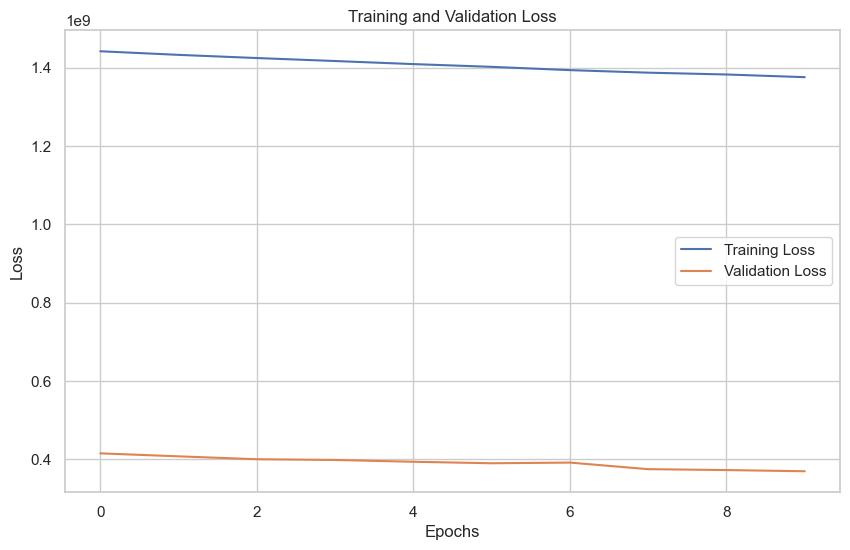

In [58]:
# Plot the training loss and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [59]:

history1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 612833664.0000 - val_loss: 370637984.0000
Epoch 2/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2224253440.0000 - val_loss: 364531008.0000
Epoch 3/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 958771520.0000 - val_loss: 360545952.0000
Epoch 4/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1511643776.0000 - val_loss: 355464064.0000
Epoch 5/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2268518656.0000 - val_loss: 350798592.0000
Epoch 6/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 873087616.0000 - val_loss: 351714016.0000
Epoch 7/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1166673792.0000 - val_loss: 346980256.0000
Epoch 8/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1392340736.0000 - val_loss: 343782912.0000
Epoch 9/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 708323072.0000 - val_loss: 344111552.0000
Epoch 10/10
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - lo

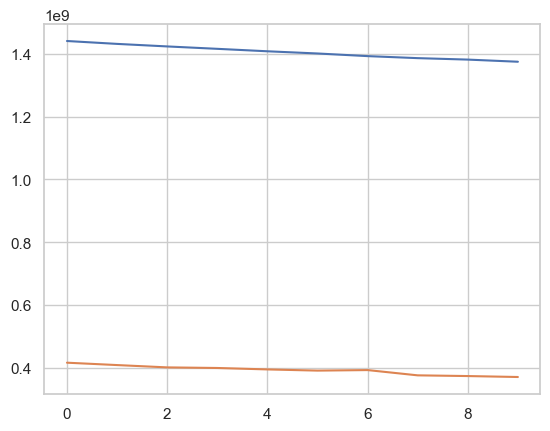

In [60]:
# Plot without dropouts
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)

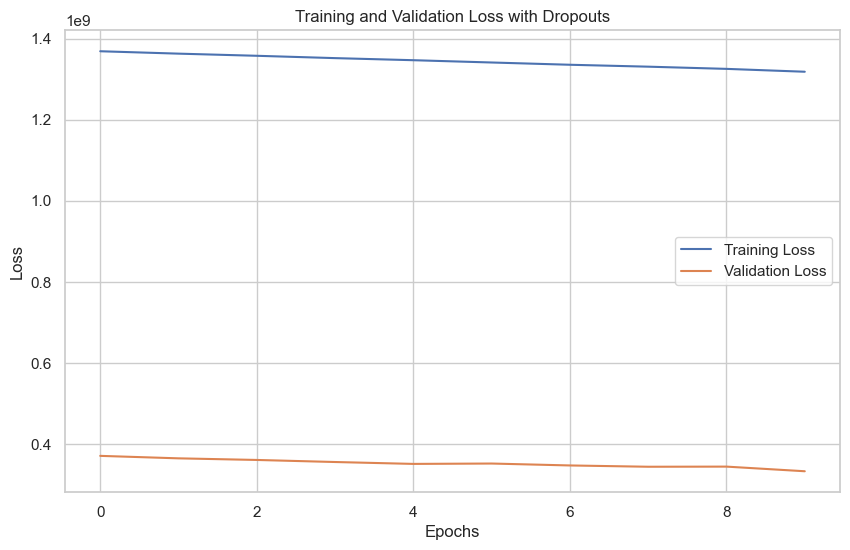

In [61]:
# Plot the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Dropouts')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

*-------------------------------*-------------------------------*--------------------------------*-----------------------------*

D:\ANACONDA\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0000e+00 - loss: -1866403020800.0000 - val_accuracy: 0.0000e+00 - val_loss: -29553116315648.0000
Epoch 2/50
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: -59331726802944.0000 - val_accuracy: 0.0000e+00 - val_loss: -187896078270464.0000
Epoch 3/50
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: -257668526637056.0000 - val_accuracy: 0.0000e+00 - val_loss: -521610524098560.0000
Epoch 4/50
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: -648624216211456.0000 - val_accuracy: 0.0000e+00 - val_loss: -1058105324470272.0000
Epoch 5/50
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: -1237854671863808.0000 - val_accuracy: 0.0000e+00 - val_loss: -1831848514682880.0000
Epoch 6/50
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: -2089114505576448.0000 - val_accuracy: 0.0000e+00 - val_loss: -2878681697484

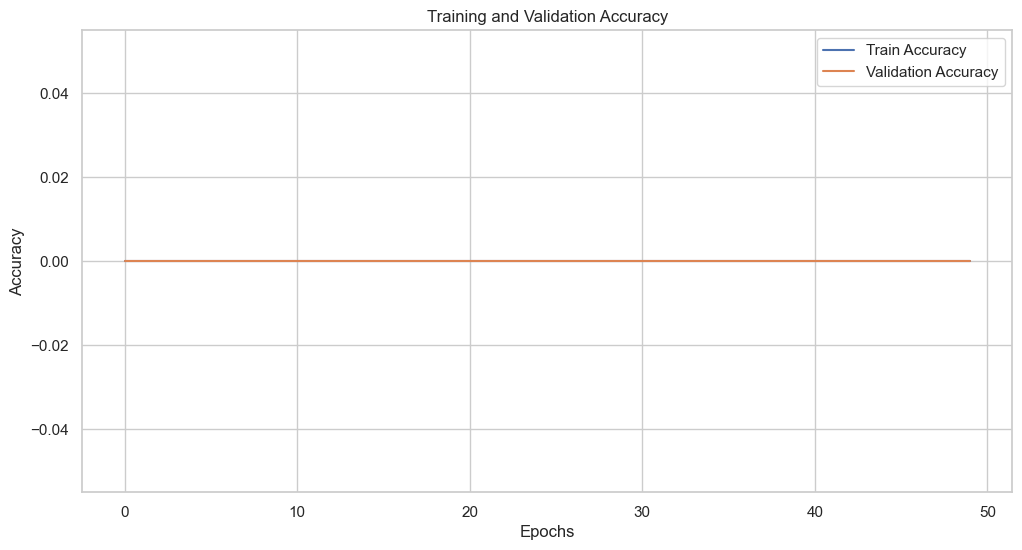

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Splitting the data into training and testing sets
X = df.drop(columns=['price_in_euro'])
y = df['price_in_euro']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' if multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {test_acc:.4f}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: -773217808338124800.0000

Test Accuracy: 0.0000


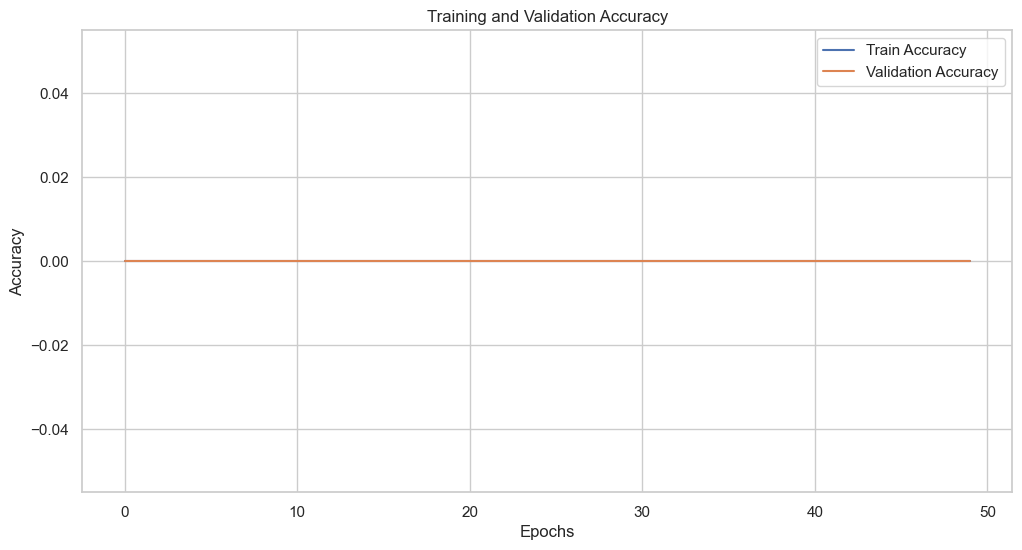

In [50]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {test_acc:.4f}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()